<a href="https://colab.research.google.com/github/sitikharomah/Tugas-Besar-Data-Mining/blob/main/DataMining_3_Model_daun_mangga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARY

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import DenseNet121, ResNet50
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# PERSIAPAN DATA

In [4]:
data_dir = "/content/drive/MyDrive/DATASET DAUN MANGGA"  # Folder utama berisi 3 folder kelas
img_size = 224
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    shear_range=0.1,
    brightness_range=[0.8,1.2],
    fill_mode='nearest',
    horizontal_flip=True
)

train_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 1440 images belonging to 3 classes.
Found 360 images belonging to 3 classes.


# MODEL DENSENET121

In [5]:
from tensorflow.keras.applications import DenseNet121

base_densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_densenet.trainable = False

model_densenet = Sequential([
    base_densenet,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model_densenet.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

print("\nTraining Model DenseNet121")
history_densenet = model_densenet.fit(train_gen, epochs=50, validation_data=val_gen)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training Model DenseNet121


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 556s 6s/step - accuracy: 0.5410 - loss: 0.9676 - val_accuracy: 0.6361 - val_loss: 0.7631
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 31s 348ms/step - accuracy: 0.8932 - loss: 0.3699 - val_accuracy: 0.7917 - val_loss: 0.6639
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 33s 368ms/step - accuracy: 0.9403 - loss: 0.2252 - val_accuracy: 0.8028 - val_loss: 0.6503
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 44s 397ms/step - accuracy: 0.9617 - loss: 0.1687 - val_accuracy: 0.8083 - val_loss: 0.6309
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 35s 392ms/step - accuracy: 0.9721 - loss: 0.1210 - val_accuracy: 0.8361 - val_loss: 0.5589
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 36s 399ms/step - accuracy: 0.9748 - loss: 0.1037 - val_accuracy: 0.8194 - val_loss: 0.5998
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 38s 425ms/step - accuracy: 0.9669 - loss: 0.0983 - val_accuracy: 0.8194 - val_loss: 0.6718
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 34s 375ms/step - accuracy: 0.9805 - loss: 0.0795 - val_accura

In [ ]:
base_densenet.summary()

Model: "densenet121"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 7,037,504 (26.85 MB)

# MODEL RESNET50

In [6]:
base_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_resnet.trainable = False

model_resnet = Sequential([
    base_resnet,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model_resnet.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

print("\nTraining Model ResNet50")
history_resnet = model_resnet.fit(train_gen, epochs=50, validation_data=val_gen)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training Model ResNet50
Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 51s 439ms/step - accuracy: 0.3169 - loss: 1.2428 - val_accuracy: 0.3333 - val_loss: 1.1076
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 31s 349ms/step - accuracy: 0.3333 - loss: 1.1511 - val_accuracy: 0.3333 - val_loss: 1.1042
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 33s 361ms/step - accuracy: 0.3492 - loss: 1.1183 - val_accuracy: 0.3083 - val_loss: 1.1064
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 32s 354ms/step - accuracy: 0.4110 - loss: 1.0762 - val_accuracy: 0.3333 - val_loss: 1.1141
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 33s 364ms/step - accuracy: 0.3730 - loss: 1.0969 - val_accuracy: 0.3139 - val_loss: 1.1154
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 32s 352ms/step - accuracy: 0.3961 - loss: 1.0856 - val_accuracy: 0.3306 - val_loss: 1.1253
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 32s 358ms/step - accuracy: 0.3693 - loss: 1.0818 - val_accuracy: 0.3000 - val_loss: 1.1256
Epoch 8/50
90/90 ━━━━

In [ ]:
base_resnet.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

# MODEL MOBILENETV2

In [7]:
base_mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_mobilenet.trainable = False

model_mobilenet = Sequential([
    base_mobilenet,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model_mobilenet.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

print("\nTraining Model MobileNetV2")
history_mobilenet = model_mobilenet.fit(train_gen, epochs=50, validation_data=val_gen)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training Model MobileNetV2
Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 63s 575ms/step - accuracy: 0.6095 - loss: 0.8804 - val_accuracy: 0.8111 - val_loss: 0.6007
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 39s 433ms/step - accuracy: 0.9181 - loss: 0.2408 - val_accuracy: 0.8361 - val_loss: 0.5516
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 45s 501ms/step - accuracy: 0.9659 - loss: 0.1340 - val_accuracy: 0.8083 - val_loss: 0.6950
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 45s 498ms/step - accuracy: 0.9689 - loss: 0.0978 - val_accuracy: 0.8194 - val_loss: 0.6397
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 69s 351ms/step - accuracy: 0.9755 - loss: 0.0861 - val_accuracy: 0.8306 - val_loss: 0.6726
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 33s 371ms/step - accuracy: 0.9838 - loss: 0.0529 - val_accuracy: 0.8278 - val_loss: 0.6615
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 36s 397ms/step - accuracy: 0.9888 - loss: 0.0379 - val_accuracy: 0.8194 - val_loss: 0.8344
Epoch 8/50
90/90 ━━━

In [ ]:
base_mobilenet.summary()

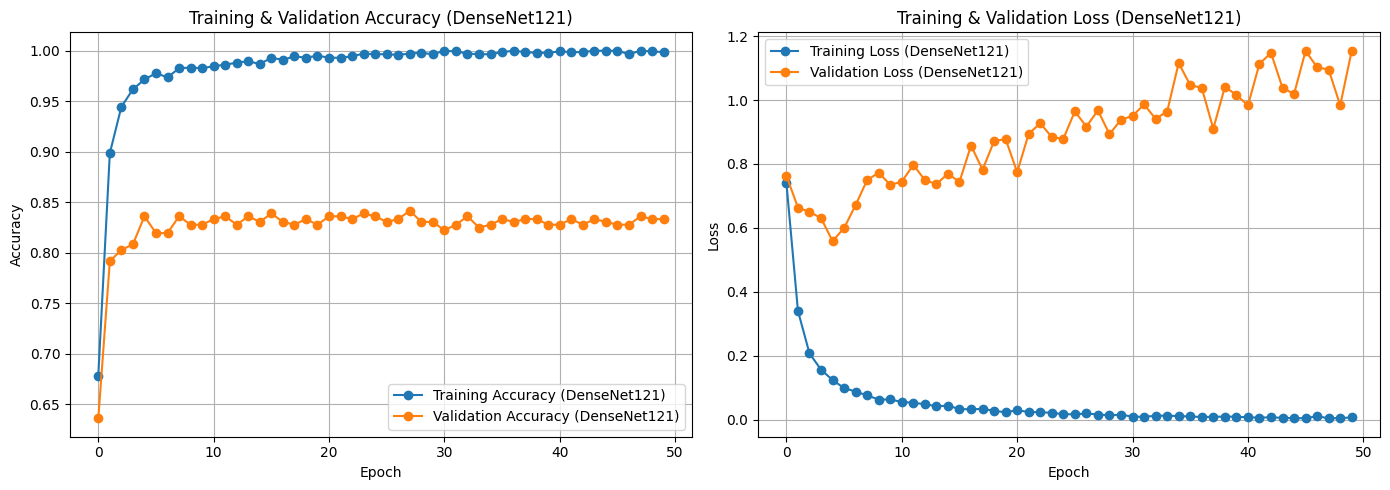

In [8]:
# grafik loss/accuracy training - validation for DenseNet121
plt.figure(figsize=(14, 5))

# Akurasi DenseNet121
plt.subplot(1, 2, 1)
plt.plot(history_densenet.history['accuracy'], label='Training Accuracy (DenseNet121)', marker='o')
plt.plot(history_densenet.history['val_accuracy'], label='Validation Accuracy (DenseNet121)', marker='o')
plt.title('Training & Validation Accuracy (DenseNet121)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss DenseNet121
plt.subplot(1, 2, 2)
plt.plot(history_densenet.history['loss'], label='Training Loss (DenseNet121)', marker='o')
plt.plot(history_densenet.history['val_loss'], label='Validation Loss (DenseNet121)', marker='o')
plt.title('Training & Validation Loss (DenseNet121)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



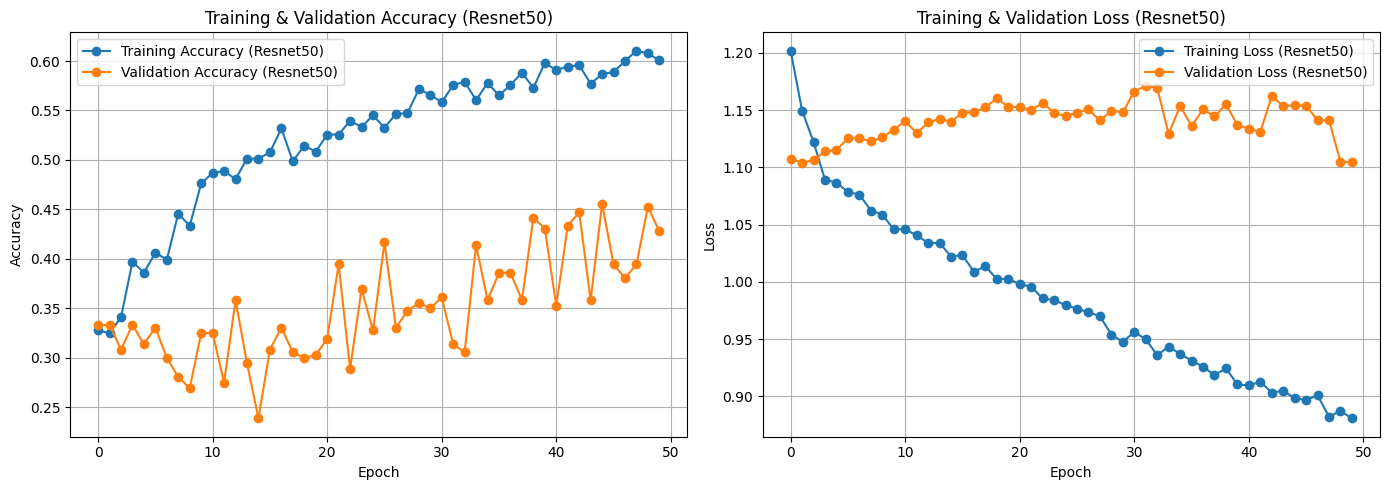

In [9]:
# grafik loss/accuracy training - validation for Resnet50
plt.figure(figsize=(14, 5))

# Akurasi Resnet50
plt.subplot(1, 2, 1)
plt.plot(history_resnet.history['accuracy'], label='Training Accuracy (Resnet50)', marker='o')
plt.plot(history_resnet.history['val_accuracy'], label='Validation Accuracy (Resnet50)', marker='o')
plt.title('Training & Validation Accuracy (Resnet50)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Resnet50
plt.subplot(1, 2, 2)
plt.plot(history_resnet.history['loss'], label='Training Loss (Resnet50)', marker='o')
plt.plot(history_resnet.history['val_loss'], label='Validation Loss (Resnet50)', marker='o')
plt.title('Training & Validation Loss (Resnet50)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

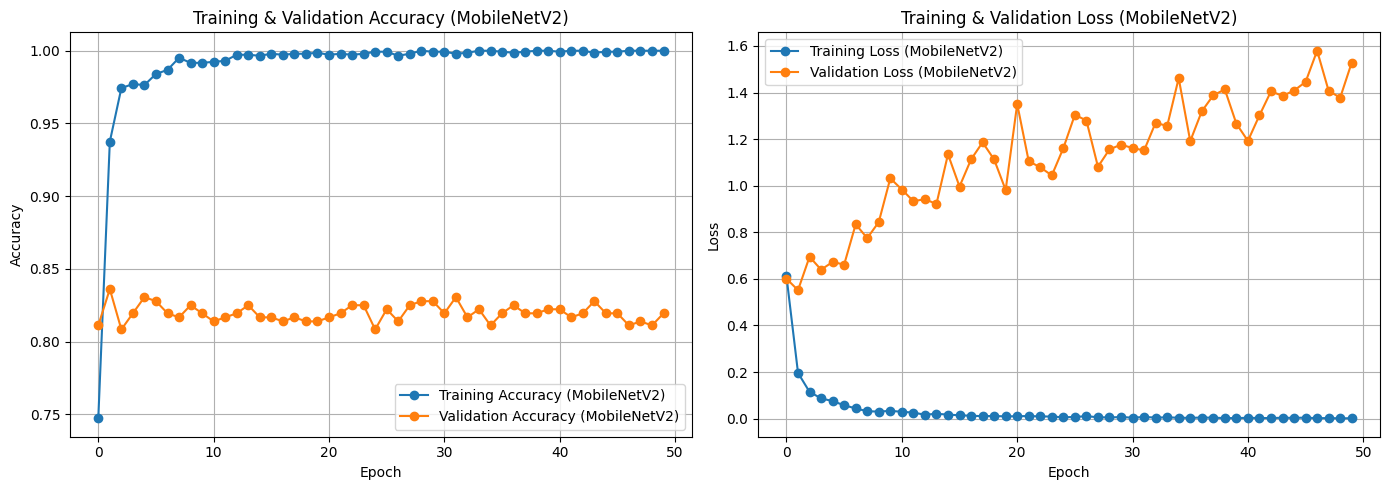

In [10]:
# Grafik loss/accuracy training - validation for MobileNetV2
plt.figure(figsize=(14, 5))

# Akurasi MobileNetV2
plt.subplot(1, 2, 1)
plt.plot(history_mobilenet.history['accuracy'], label='Training Accuracy (MobileNetV2)', marker='o')
plt.plot(history_mobilenet.history['val_accuracy'], label='Validation Accuracy (MobileNetV2)', marker='o')
plt.title('Training & Validation Accuracy (MobileNetV2)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss MobileNetV2
plt.subplot(1, 2, 2)
plt.plot(history_mobilenet.history['loss'], label='Training Loss (MobileNetV2)', marker='o')
plt.plot(history_mobilenet.history['val_loss'], label='Validation Loss (MobileNetV2)', marker='o')
plt.title('Training & Validation Loss (MobileNetV2)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# VISUALISASI KELAS

Kelas yang terdeteksi:
0: Antraknosa
1: Cendawan Jelaga
2: Ulat daun


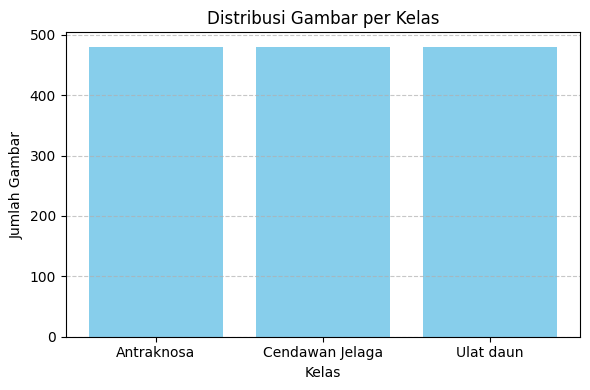


Kelas yang terdeteksi:
0: Antraknosa
1: Cendawan Jelaga
2: Ulat daun


In [12]:
class_labels = list(train_gen.class_indices.keys())

print("Kelas yang terdeteksi:")
for label, index in train_gen.class_indices.items():
    print(f"{index}: {label}")

# Tambahkan visualisasi distribusi jumlah gambar per kelas
from collections import Counter
label_counts = Counter(train_gen.classes)
plt.figure(figsize=(6,4))
plt.bar([class_labels[i] for i in label_counts.keys()], label_counts.values(), color='skyblue')
plt.title("Distribusi Gambar per Kelas")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Gambar")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
# ===========================
class_labels = list(train_gen.class_indices.keys())

print("\nKelas yang terdeteksi:")
for label, index in train_gen.class_indices.items():
    print(f"{index}: {label}")

# CONFUSION MATRIX & KLASIFIKASI

##DenseNet121

23/23 ━━━━━━━━━━━━━━━━━━━━ 33s 964ms/step

Classification Report (DenseNet121):
                 precision    recall  f1-score   support

     Antraknosa       0.78      0.99      0.87       120
Cendawan Jelaga       0.82      0.98      0.89       120
      Ulat daun       0.98      0.52      0.68       120

       accuracy                           0.83       360
      macro avg       0.86      0.83      0.81       360
   weighted avg       0.86      0.83      0.81       360



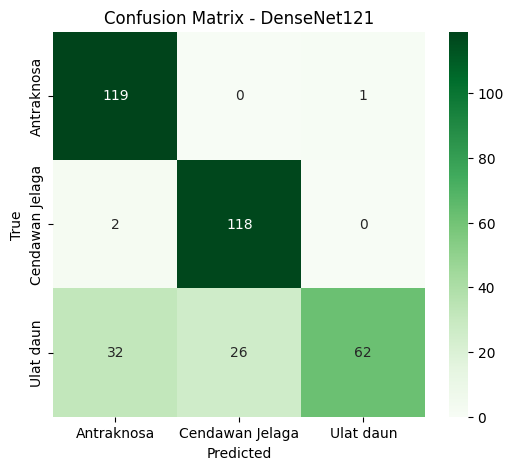

In [13]:
# DenseNet121
pred_densenet = model_densenet.predict(val_gen)
y_pred_densenet = np.argmax(pred_densenet, axis=1)
y_true = val_gen.classes

print("\nClassification Report (DenseNet121):")
print(classification_report(y_true, y_pred_densenet, target_names=class_labels))

cm2 = confusion_matrix(y_true, y_pred_densenet)
plt.figure(figsize=(6,5))
sns.heatmap(cm2, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - DenseNet121')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


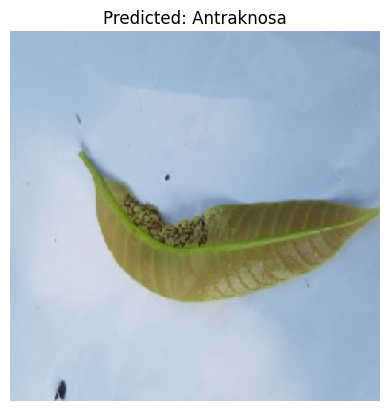

In [18]:
predict_image("model_densenet_daun_mangga.h5", "/content/drive/MyDrive/DATASET DAUN MANGGA/Antraknosa/20211008_124310 (Custom).jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


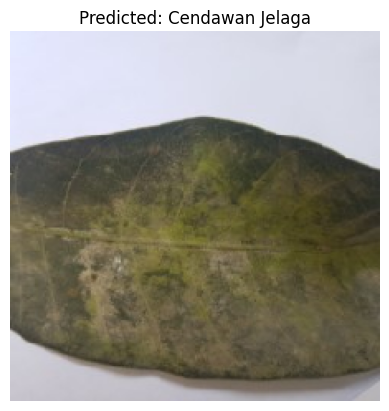

In [19]:
predict_image("model_densenet_daun_mangga.h5", "/content/drive/MyDrive/DATASET DAUN MANGGA/Cendawan Jelaga/20211109_121410 (Custom).jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


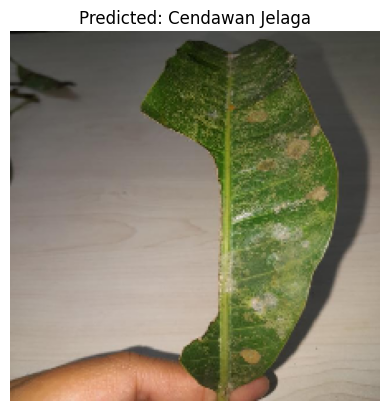

In [20]:
predict_image("model_densenet_daun_mangga.h5", "/content/drive/MyDrive/DATASET DAUN MANGGA/Ulat daun/20241111_210626_jpg.rf.07183a0915047d8ee23a55415a06807c.jpg")

##Resnet50

23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 474ms/step

Classification Report (ResNet50):
                 precision    recall  f1-score   support

     Antraknosa       0.41      0.42      0.42       120
Cendawan Jelaga       0.61      0.79      0.69       120
      Ulat daun       0.27      0.17      0.21       120

       accuracy                           0.46       360
      macro avg       0.43      0.46      0.44       360
   weighted avg       0.43      0.46      0.44       360



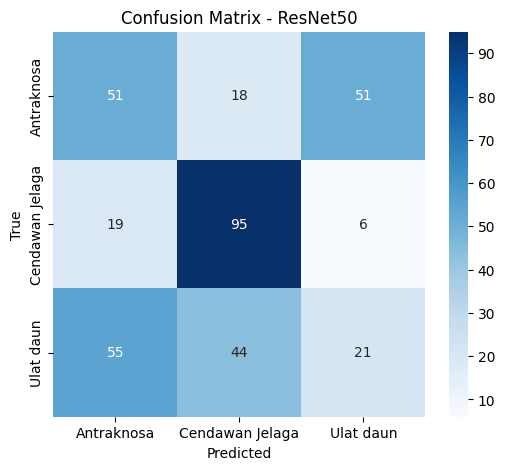

In [14]:
# Resnet50
pred_resnet = model_resnet.predict(val_gen)
y_true = val_gen.classes
y_pred = np.argmax(pred_resnet, axis=1)

print("\nClassification Report (ResNet50):")
print(classification_report(y_true, y_pred, target_names=class_labels))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - ResNet50')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


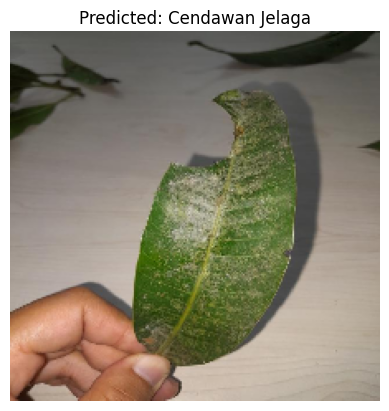

In [21]:
predict_image("model_resnet_daun_mangga.h5", "/content/drive/MyDrive/DATASET DAUN MANGGA/Ulat daun/20241111_210655_jpg.rf.4baae44256b8cef98b6c47533748ebdf.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


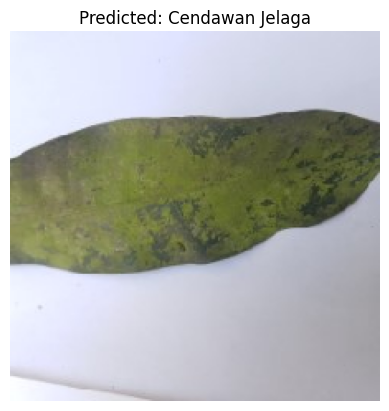

In [22]:
predict_image("model_resnet_daun_mangga.h5", "/content/drive/MyDrive/DATASET DAUN MANGGA/Cendawan Jelaga/20211109_121723 (Custom).jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


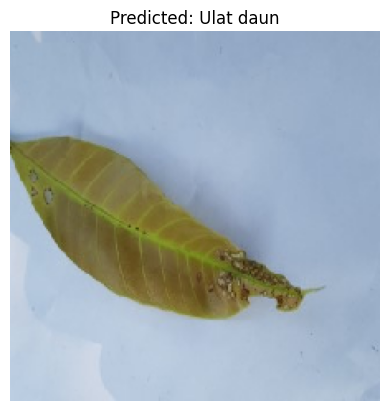

In [23]:
predict_image("model_resnet_daun_mangga.h5", "/content/drive/MyDrive/DATASET DAUN MANGGA/Antraknosa/20211008_124336 (Custom).jpg")

23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 524ms/step

Classification Report (MobileNetV2):
                 precision    recall  f1-score   support

     Antraknosa       0.76      0.97      0.86       120
Cendawan Jelaga       0.82      1.00      0.90       120
      Ulat daun       0.95      0.48      0.64       120

       accuracy                           0.82       360
      macro avg       0.85      0.82      0.80       360
   weighted avg       0.85      0.82      0.80       360



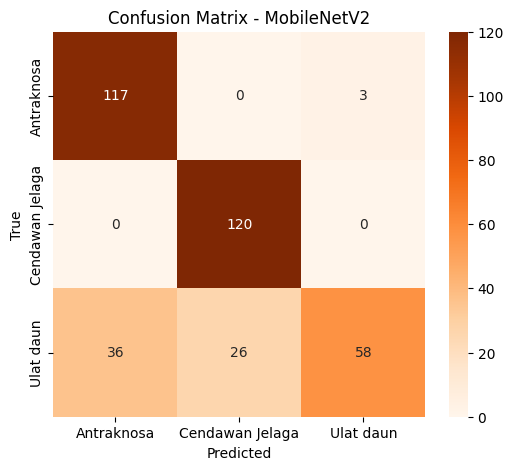

In [15]:
# MobileNetV2
pred_mobilenet = model_mobilenet.predict(val_gen)
y_pred_mobilenet = np.argmax(pred_mobilenet, axis=1)
y_true = val_gen.classes

print("\nClassification Report (MobileNetV2):")
print(classification_report(y_true, y_pred_mobilenet, target_names=class_labels))

cm3 = confusion_matrix(y_true, y_pred_mobilenet)
plt.figure(figsize=(6,5))
sns.heatmap(cm3, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - MobileNetV2')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


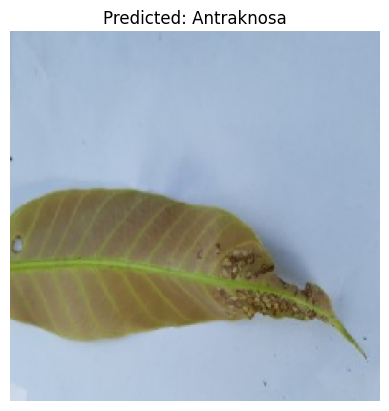

In [24]:
predict_image("model_mobilenet_daun_mangga.h5", "/content/drive/MyDrive/DATASET DAUN MANGGA/Antraknosa/20211008_124341 (Custom).jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


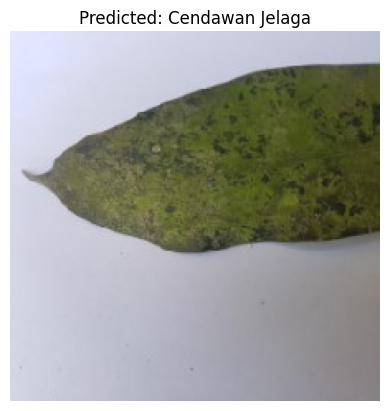

In [25]:
predict_image("model_mobilenet_daun_mangga.h5", "/content/drive/MyDrive/DATASET DAUN MANGGA/Cendawan Jelaga/20211109_121648 (Custom).jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


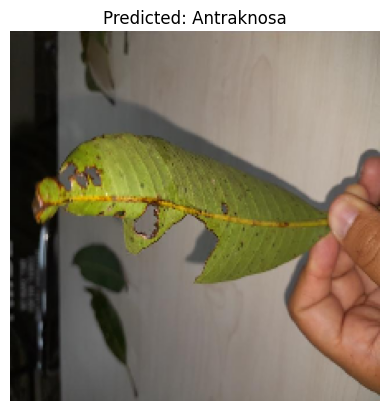

In [26]:
predict_image("model_mobilenet_daun_mangga.h5", "/content/drive/MyDrive/DATASET DAUN MANGGA/Ulat daun/20241111_211007_jpg.rf.f09278a154e2b299404de39e0d3a1131.jpg")

# SIMPAN MODEL

In [16]:
model_densenet.save("model_densenet_daun_mangga.h5")
model_resnet.save("model_resnet_daun_mangga.h5")
model_mobilenet.save("model_mobilenet_daun_mangga.h5")

# PREDIKSI CITRA TUNGGAL

In [17]:
def predict_image(model_path, image_path):
    model = load_model(model_path)
    img = load_img(image_path, target_size=(img_size, img_size))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    predicted_class = class_labels[np.argmax(prediction)]
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

In [27]:
def show_image_samples(gen):
    test_dict=train_gen.class_indices
    classes=list(test_dict.keys())
    images,labels=next(gen) # get a sample batch from the generator
    plt.figure(figsize=(20, 20))
    length=len(labels)
    if length<25:   #show maximum of 25 images
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5, 5, i + 1)
        image=images[i]
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color='blue', fontsize=16)
        plt.axis('off')
    plt.show()

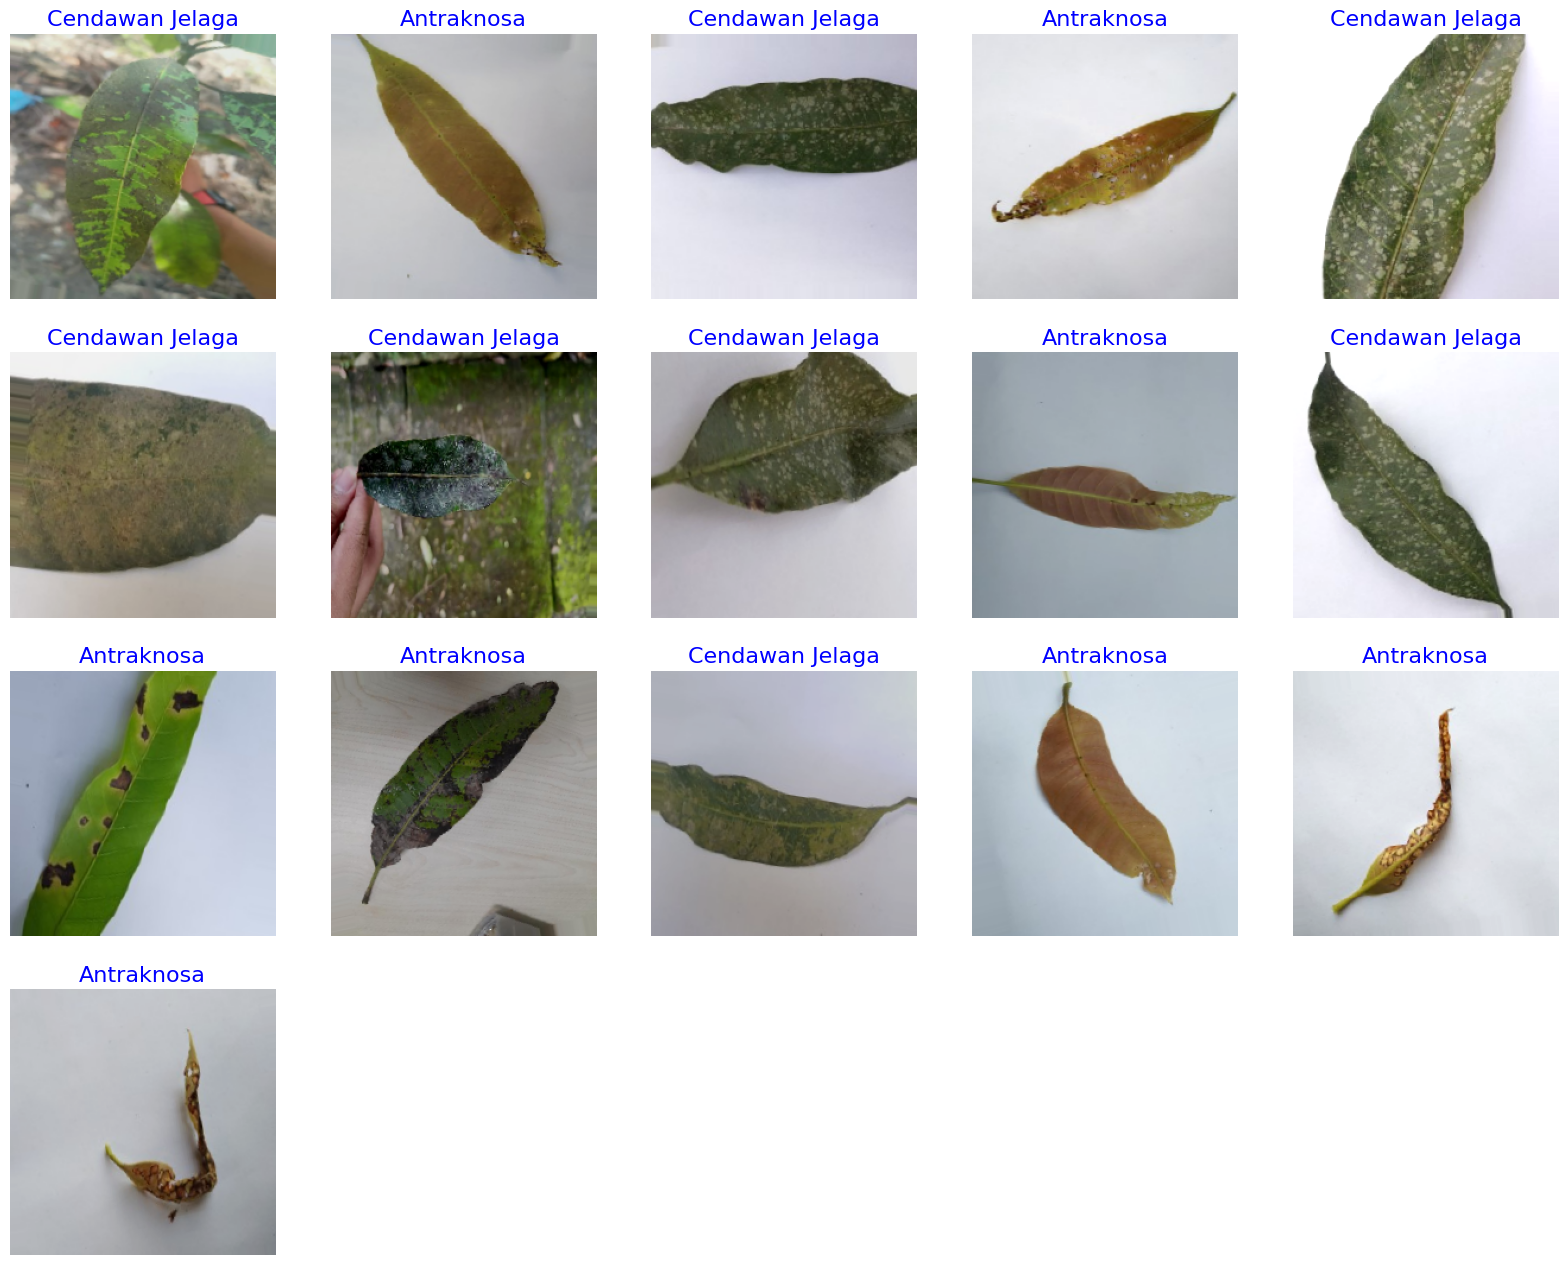

In [28]:
show_image_samples(train_gen)